# Python Week 3: Comprehensions, Pandas, and Iterators

For this week we will take a look at alternative and possibly faster approaches to modifying inputs of data containing structures for the purpose of cleaner code and optimization. These techniques can be initially confusing, but as you'll see they often share similar logic to loops that you're already familiar with.

In [1]:
# import necessary libraries for this week
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

First let's take a look at "lambdas." Lambdas, are small anonymized functions. They can only be a single expression i.e. one line of code, but can take as many inputs as you'd like. Their purpose won't be immediately clear, but lets take a look at a few low level examples, and then apply it in a more purposeful manner. Lambda fucntions are crucial in functional programming languages, but as python is both object oriented, and functional we cna utilize their advantages. 

In [4]:
# define a lambda function to multiply any argument by 5

x = lambda i: i * 5 
print(x(5))

# as you should notice, x becomes a sort of function call, not all dissimilar to a real function. We could
# certainly describe the same function as such

def multiply_five(i):
    product = i * 5
    return product
print(multiply_five(5))

# as you can see we get the exact same result, so what is their purpose? Well in this example, we can at the very
# make our code cleaner and it cerainly makes it simpler to type but what else can they do? Let's move to the next 
# cell to make it more obvious


25
15
25


In [6]:
# one way in which we can use lambdas is to put them inside another function
# for example:

def my_function(n):
    return lambda a, b, c : (a + b + c) * n

triple_sum = my_function(9)
print(triple_sum(6,9,2))

# in essence we are layering functions inside of eachother, this can allow us to create possibly more generalized
# functions that could possibly be flexible in their implementation


153


In [7]:
# let's look at a more complex example, this is a real python interview question!
# lets say we have a list of numbers, and we need to separate odd numbers from evens

numbers = [0, 45, 875, 234, 57, 5, 21, 22, 98, 133, 452, 764, 898, 10000]

# one way to solve this is to do the following

odd_numbers = []
for i in numbers:
    if i % 2 == 1:
        odd_numbers.append(i)
print(odd_numbers)

# this is a toally ok solution, and I would be happy if any of you produced this result as beggining programmers
# but let me show you a more elegant solution using the higher order function filter
# filter takes a function as an input and tests if iterations meet a set of conditions i.e.

print(list(filter(lambda x: x % 2 == 1, numbers)))

# this isn't the only uses of lambdas but this is likely the most relevant to you, lambda allows you to write code
# faster, and possibly more optimized, by passing low level lambdas to higher ordered functions


[45, 875, 57, 5, 21, 133]
[45, 875, 57, 5, 21, 133]


Now lets look at what a comprehension does, these are similar to lambdas in many ways. In essence list and dictionary comprehensions are shorthand loops that are also faster (in most cases). 

In [9]:
# Let's create a list
# now let's also say i need the original list, but i need specific informatiom from this old list
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# lets say i want numbers that are divisible by three
my_new_list = [x for x in my_list if x % 3 == 0]
print(my_new_list)


# this might seem like a useless concept but this is an incredibly powerful tool that seasoned python
# programmers are expected to know, lets take a look at how we can apply this to dictioanries as well

# lets say i have a pandas dataframe
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
# now lets say i need the numerical index for each entry in my dataset

column_names = iris.columns.to_list() # uses pandas .to_list() method to get a list of column names
column_number = list(item for item in range(0, len(column_names))) # another way to create a list w/ comprehension

# not lets say that we need to create a dictioanry that maps the column name to the numerical index
name_and_number = {column_names[x]: column_number[x] for x in range(len(column_number))}
print(name_and_number)

<generator object <genexpr> at 0x169990c80>
{'sepal_length': 0, 'sepal_width': 1, 'petal_length': 2, 'petal_width': 3, 'species': 4}


Ok, now that we comprehend comprehensions, lets move onto some advanced topics in pandas/numpy. One of the ways in which Pandas shines as a library is its ability to clean data. Let's say we have the following problems:

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


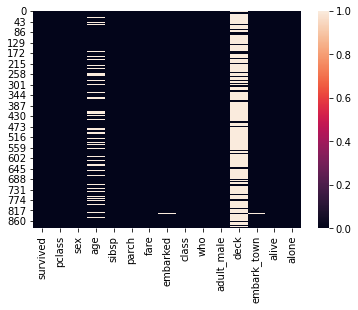

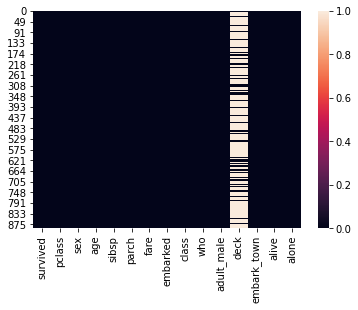

In [10]:
# lets look at how we can clean data in Pandas
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
age = titanic['age']
print(age) # notice that we have NaN or "not a number" values. These can pose problems in data analysis lets look
# ar a few methods of cleaning this up 

# we can remove any row that has a NaN value entirely
# first lets find NaN values using seaborns (not really the best way just fun to visualize)
plt.show(sb.heatmap(titanic.isnull()))
# as we can see we have many NaN values in the age and deck column, lets see how we can work with this
# lets drop values where the age column is null
titanic1 = titanic.copy() # make a copy
titanic1 = titanic1.dropna(subset=['age']) # remove NaN values in the column 'age'
plt.show(sb.heatmap(titanic1.isnull())) # seaborns corr plots dont



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


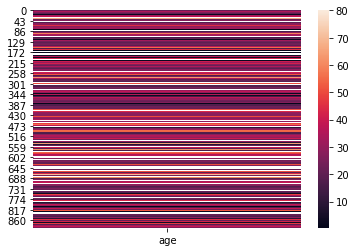

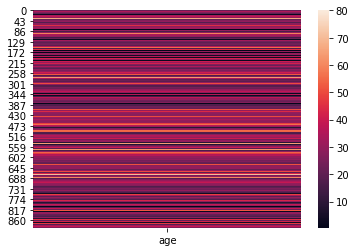

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64
29.69911764705882


In [11]:
# another possible way is to replace the missing values with some valid numerical value, say the median or mean
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic = titanic.select_dtypes(include=np.number)
print(titanic['age'])
plt.show(sb.heatmap(titanic[['age']]))


#for this we can use the apply method
# apply will perform any operation across any axis of a pandas DF
titanic = titanic.apply(lambda x: x.fillna(x.mean()), axis=0) # fill each NaN value with the mean from the column
plt.show(sb.heatmap(titanic[['age']]))
print(titanic['age'])
print(titanic['age'].mean())

In [14]:
# we can also apply an entire fucntion across ever element in a DF using a similar method .applymap()

# lets say i have the following dataframe
df = pd.DataFrame([[1, 2.12, 67.87], [3.356, 4.567, 34.98765678533], [5, 7, 43.7]])
# and lets also say i need the square root of each value
df = df.applymap(lambda x: x**(-1/2))
print(df)
# as you can see this applies this lambda fucntion to each element as opposed to a single axis

          0         1         2
0  1.000000  0.686803  0.121384
1  0.545870  0.467934  0.169061
2  0.447214  0.377964  0.151272


In [15]:
# one last thing I forgot to go into detail about during week 1
# if we need to iterate through two objects we may want to take advantage of zip and or enumerate

a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b) # zip basically pairs object together
print(list((i, j) for i, j in x)) # print the structure of a zip

elements = ('foo', 'bar', 'baz') # arbitrary list of elements
for iterator, identity in enumerate(elements): 
    print((iterator, identity))
    
# in essence zip creates iteratable tuples, and enuemrate adds an indexable number that can be used
# when we need a numerical index

[('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica')]
(0, 'foo')
(1, 'bar')
(2, 'baz')


In [19]:
# and now a quick example of enumerate
my_list = ["a", "b", "c", "d", "e"]
def even_items(iterable):
    return [v for i, v in enumerate(iterable, start=1) if not i % 2] # grab all even indexes from some list
print(even_items(my_list))

a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")
# lets look at a quick example of zip
for i, j in zip(a, b): # we can alternatively write for i,j in zip(a,b)
    if "J" in i and "e" in j: # check if a capital J is in i, or if a lowercase e is in j
        print(i, j) 
    else:      # print j,i if the prior condition isn't met
        print(j, i)

['a', 'c', 'e']
John Jenny
Christy Charles
Monica Mike
